In [35]:
from network import *
from inference import *
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
T,N = 10,100

network = Network(N=N, dirichlet=0.5)

A0 = network.generate_A0(T=T, avg_degree=10)
A1 = network.apply_exposure(A0, K_exp=3)

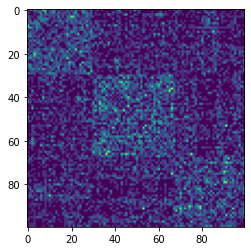

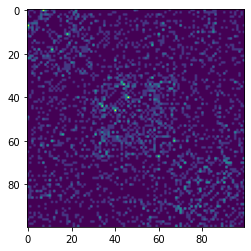

In [53]:
plt.imshow(A0.sum(axis=0))
plt.show()
plt.imshow(A1.sum(axis=0))
plt.show()

In [54]:
mu, Z, u, w = network.get_mu(), network.get_Z(), network.get_u(), network.get_w()

In [55]:
print("average degree A0: ", A0.sum()/T/N, "average degree A1: ", A1.sum()/T/N)

average degree A0:  9.894 average degree A1:  3.236


### The probability of exposure is $\frac{1}{K_{exp}}$

## Testing Exposure Inference

In [61]:
losses_exp, theta_exp = fit(A1, 3,3, symmetric=True, iter1=1000)
mu_exp,Q_exp,u_exp,_,w_exp = theta_exp

running Exp inference for 15000 iterations: 



/home/jschulz/DynamicExposure/src/inference.py:48: RuntimeWarning: divide by zero encountered in true_divide
  posterior = control_well_definedness(Q*np.log(1/Q) + (1-Q)*np.log(1/(1-Q))).sum()
/home/jschulz/DynamicExposure/src/inference.py:48: RuntimeWarning: invalid value encountered in multiply
  posterior = control_well_definedness(Q*np.log(1/Q) + (1-Q)*np.log(1/(1-Q))).sum()


Exposure inference with T=10, N=100, K=3 and 5076 iterations took 405.34171604600124 seconds



In [57]:
print("Accuracy predicting mu: ", evaluate_memberships(mu, mu_exp, mu, mu_exp)[0])
print("Accuracy predicting u: ", evaluate_memberships(u, u_exp, mu, mu_exp)[0])
print("Accuracy predicting Z: ", calculate_AUC(Z, Q_exp))

Accuracy predicting mu:  0.7130210993584335
Accuracy predicting u:  0.6476784389460428
Accuracy predicting Z:  0.4526767771632878


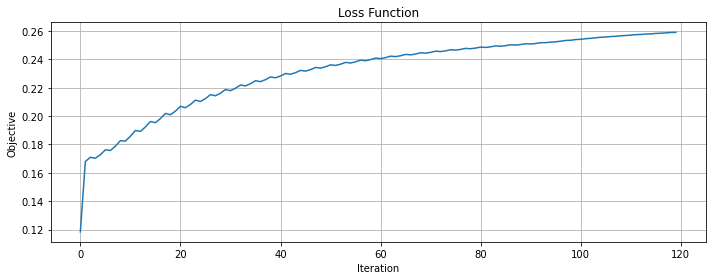

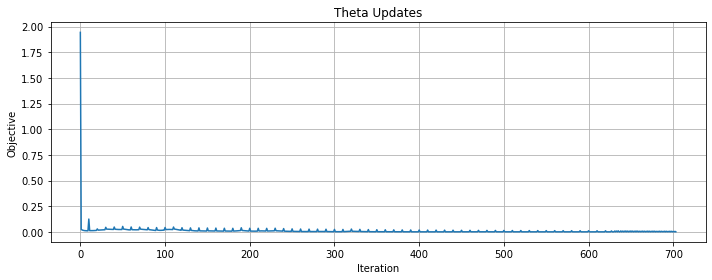

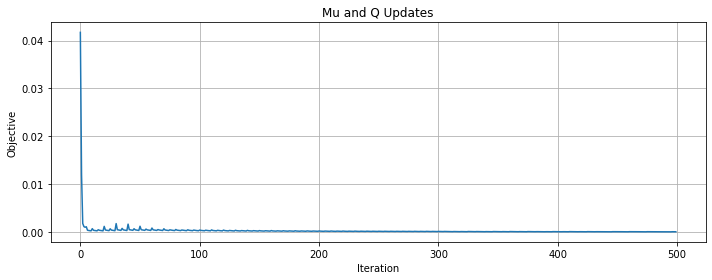

In [58]:
plot_losses(losses_exp[0], title="Loss Function")
plot_losses(losses_exp[1], title="Theta Updates")
plot_losses(losses_exp[2], title="Mu and Q Updates")

## No Exposure Inference

In [59]:
losses_noexp, theta_noexp = fit(A1, 3,3, symmetric=True, exp=False)
u_noexp,v_noexp,w_noexp = theta_noexp

running NoExp inference for 20000 iterations: 

Convergence Criterium satisfied
No exposure inference with T=10, N=100, K=3 and 2020 iterations took 7.769151878001139 seconds



In [60]:
evaluate_memberships(u, u_noexp, v, v_noexp, verbose=True)

Acccuracy of predictions: 
	 u: 0.6543104732097423
	 v: 0.5752163180991405
Zero estimate counts: 
	 u: 0
	 v: 0





(0.6543104732097423, 0.5752163180991405, 100, 100)

# Open Questions
- why is the loss function decreasing sometimes?
    - loss function decreases when only updating mu and Q
    - potentially numerical update problems, then nothing needs to be done
    - otherwise it could be an error in the loss computation or in the updates
- how to setup experiments? 
    - difficulty can be controlled by varying $T=\{1,5,10,50,100\}$
    - influence of exposure can be controlled by varying $K_{exp}= \{3,5,7\}$ as $p_{exp}=\frac{1}{K_{exp}}$
    - $N=100$ (not too big, close to sociopatterns datasets)
    - $avg\ degree\ A^0=100$
    - $K_{aff}=3$
    - 5 random seeds for inference
    - 5 random seeds for network generation
- theory and code always for symmetric adjacency matrices?
    - I would propose so, as it makes everything easier, we can then say it can easily be generalized for not symmetric cases
    - I would fix correlation between u and v to be always 1, not use any hard membership vectors and fix the probability ratio to 0.1

# ToDo
- theory for symmetric adjacency matrix